In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD


from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\Utteja\Downloads\Data science innomatics\DEEP_LEARNING\Deep_ learning assenment\Multiple CSV\7.xor.csv",header = None)

In [4]:
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [6]:
df[2].value_counts()

-1.0    260
 1.0    240
Name: 2, dtype: int64

In [7]:
df[2]=np.where(df[2]==-1.0,0,1)
df.head() 

,0,1,2
0,1.764052,0.400157,0
1,0.978738,2.240893,0
2,1.867558,-0.977278,1
3,0.950088,-0.151357,1
4,-0.103219,0.410599,1


<AxesSubplot:xlabel='0'>

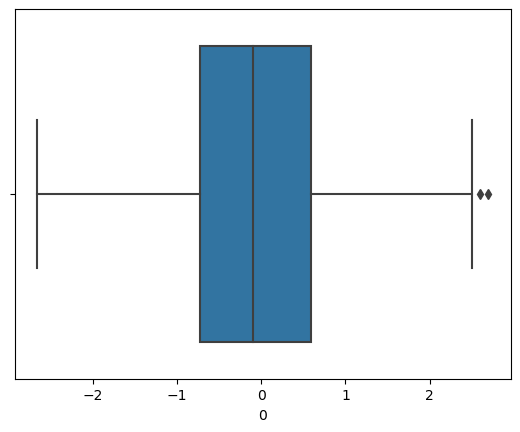

In [8]:
sns.boxplot(x = df[0])

<AxesSubplot:xlabel='1'>

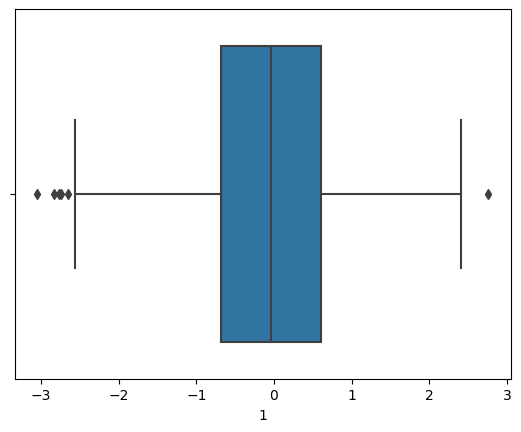

In [9]:
sns.boxplot(x = df[1])

In [10]:
x=df[[0,1]] 
y=df[2].astype(int) 

In [11]:
x.head()  

,0,1
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599


In [12]:
y.head()  

0    0
1    0
2    1
3    1
4    1
Name: 2, dtype: int32

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)  

In [15]:
x_train.shape  

(450, 2)

In [16]:
x_test.shape 

(50, 2)

In [17]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

In [18]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001))) 

In [19]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 18)                378       
                                                                 
 dense_2 (Dense)             (None, 16)                304       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 759
Trainable params: 759
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=35,validation_split=0.1) 

Epoch 1/35
41/41 [==============================] - 1s 12ms/step - loss: 0.7505 - accuracy: 0.5136 - val_loss: 0.7429 - val_accuracy: 0.5556
Epoch 2/35
41/41 [==============================] - 0s 3ms/step - loss: 0.7334 - accuracy: 0.5210 - val_loss: 0.7278 - val_accuracy: 0.5556
Epoch 3/35
41/41 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.5284 - val_loss: 0.7164 - val_accuracy: 0.6000
Epoch 4/35
41/41 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.5728 - val_loss: 0.7060 - val_accuracy: 0.6222
Epoch 5/35
41/41 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.6420 - val_loss: 0.6950 - val_accuracy: 0.7778
Epoch 6/35
41/41 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.7580 - val_loss: 0.6845 - val_accuracy: 0.8667
Epoch 7/35
41/41 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.8099 - val_loss: 0.6731 - val_accuracy: 0.9111
Epoch 8/35
41/41 [=

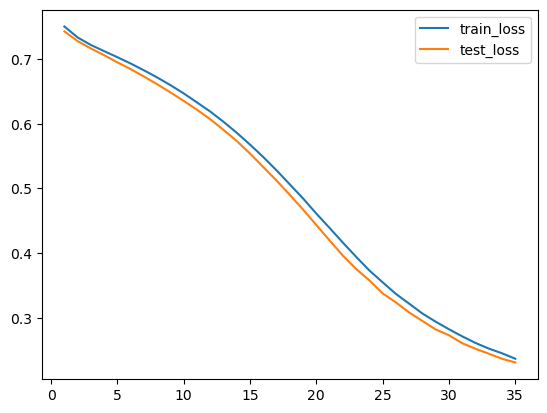

In [21]:
plt.plot(range(1,36),history.history["loss"],label="train_loss")
plt.plot(range(1,36),history.history["val_loss"],label="test_loss") 
plt.legend() 

In [22]:
predicted=model.predict(x_test) 
predicted 

2/2 [==============================] - 0s 8ms/step


array([[0.04483186],
       [0.00262035],
       [0.54486066],
       [0.9767341 ],
       [0.11907559],
       [0.12440141],
       [0.9654347 ],
       [0.034031  ],
       [0.0051836 ],
       [0.0758293 ],
       [0.22556935],
       [0.0150706 ],
       [0.99915063],
       [0.7644271 ],
       [0.47875085],
       [0.58383155],
       [0.02252263],
       [0.56286377],
       [0.9153491 ],
       [0.50680816],
       [0.89819163],
       [0.00758176],
       [0.1125332 ],
       [0.07478928],
       [0.98899204],
       [0.26410472],
       [0.8889623 ],
       [0.96039814],
       [0.96127987],
       [0.14057995],
       [0.13502216],
       [0.05164879],
       [0.784966  ],
       [0.01479869],
       [0.30864957],
       [0.45364687],
       [0.12325864],
       [0.32063037],
       [0.12980644],
       [0.07474973],
       [0.4630451 ],
       [0.14256169],
       [0.970611  ],
       [0.99864316],
       [0.9419167 ],
       [0.40073165],
       [0.57623315],
       [0.883

In [23]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]])

0.96


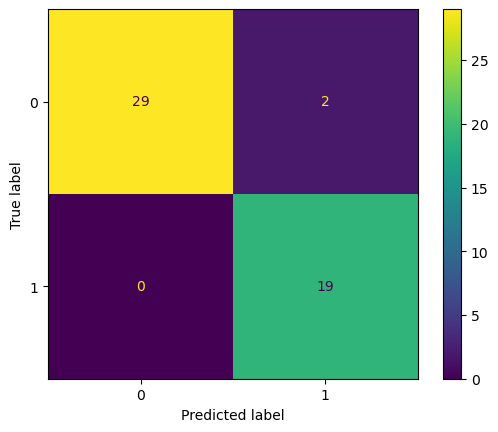

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

9600/9600 [==============================] - 17s 2ms/step


<AxesSubplot:>

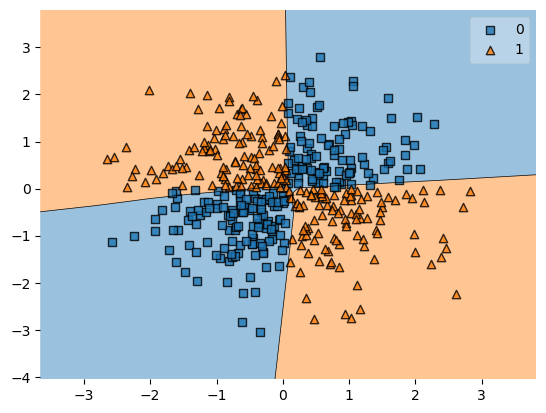

In [25]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 15s 2ms/step


<AxesSubplot:>

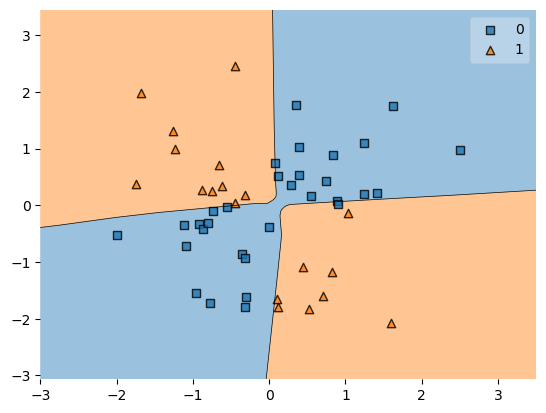

In [26]:
plot_decision_regions(x_test,y_test.values,clf=model) 